## Limpieza del set de datos de Properatti

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

Vamos a tomar la data

In [2]:
df = pd.read_csv("properatti.csv")

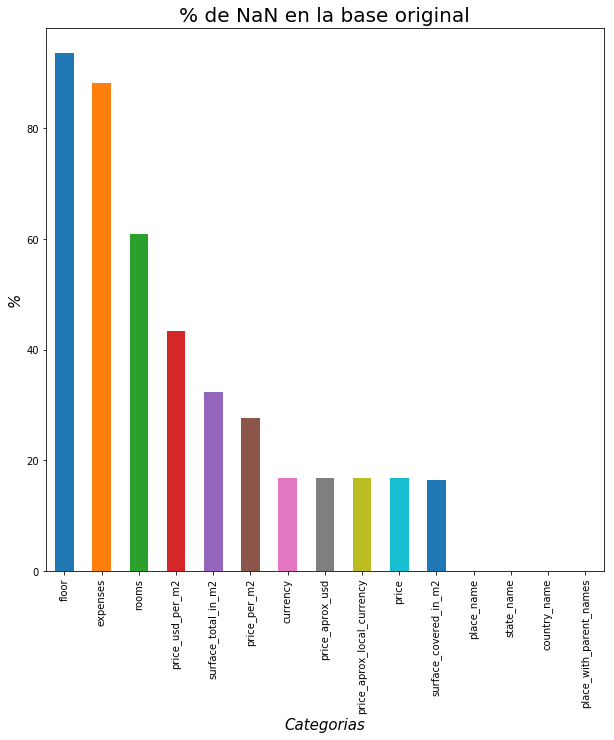

In [4]:
total = 121220
null_01 = np.round((df[["place_name","place_with_parent_names","country_name","state_name","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","floor","rooms","expenses"]].isnull().sum() / total * 100).sort_values(ascending = False),2)
null_01


null_01.plot(kind = "bar", figsize = (10,10))
plt.title("% de NaN en la base original", size = 20)
plt.xlabel("Categorias",size = 15, style = "italic")
plt.ylabel("%", size = 15, style = "italic")
plt.show()

In [23]:
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


Vamos a samplear la data, para empezar la exploración y entender los datos:

In [7]:
df.sample(100)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
80367,80367,sell,house,Lomas de Zamora,|Argentina|Bs.As. G.B.A. Zona Sur|Lomas de Zam...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.7530582,-58.4085492",-34.753058,...,60.0,2583.333333,2583.333333,NaN,NaN,NaN,http://www.properati.com.ar/1awqv_venta_casa_l...,"CASA CON DOS DORMITORIOS, LIVING COMEDOR, COCI...",Casa en Lomas de Zamora Oeste,https://thumbs4.properati.com/2/n_IZbX7mQ6q3pO...
58605,58605,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-33.1504158,-60.5219525",-33.150416,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19w0f_venta_depart...,Venta. Posesion Marzo 2018. Entrega y cuotas a...,Moreno 2000,https://thumbs4.properati.com/4/4njWqR9UKO6HDD...
39802,39802,sell,house,Chascomús,|Argentina|Buenos Aires Interior|Chascomús|Cha...,Argentina,Buenos Aires Interior,NaN,"-35.569014905,-58.0134869963",-35.569015,...,165.0,1090.909091,1090.909091,NaN,5.0,NaN,http://www.properati.com.ar/18pdu_venta_casa_c...,"Venta de Casa 5 AMBIENTES en CENTRO, Chascomús...",CASA EN VENTA,https://thumbs4.properati.com/5/zSCQ1Uvzd-ur9Z...
21002,21002,sell,house,Godoy Cruz,|Argentina|Mendoza|Godoy Cruz|,Argentina,Mendoza,3854963.0,"-32.958968,-68.847971",-32.958968,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/17eds_venta_casa_g...,Corredor Responsable: Real Estate New Generati...,VENTA CASA,https://thumbs4.properati.com/3/SbUd0MTscwJTVk...
89272,89272,sell,store,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,"-34.5962349,-58.3743164",-34.596235,...,50.0,5000.000000,5000.000000,NaN,NaN,2500.0,http://www.properati.com.ar/1b8g7_venta_local_...,Local sobre San Martín a mts de Marcelo T. PB ...,PB y 2 bños - Microcentro,https://thumbs4.properati.com/8/MIGNN4ToT9Ljl6...
114446,114446,sell,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Argentina,Capital Federal,3429595.0,"-34.595849,-58.386979",-34.595849,...,201.0,1588.785047,1691.542289,NaN,4.0,NaN,http://www.properati.com.ar/1c9wd_venta_depart...,Venta Depto de 4 Ambientes en Av. Santa Fe 140...,Recoleta Venta 4 Amb. Con Dep. Av. Santa Fe 14...,https://thumbs4.properati.com/2/QBiXtdbmP97dtp...
40899,40899,sell,apartment,Florida,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3433908.0,"-34.531748,-58.499705",-34.531748,...,NaN,NaN,NaN,NaN,1.0,NaN,http://www.properati.com.ar/18sgm_venta_depart...,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Florida,https://thumbs4.properati.com/3/zqzaDDmcS3PPMv...
101424,101424,sell,house,Nordelta,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,NaN,NaN,...,350.0,1377.777778,1771.428571,NaN,NaN,NaN,http://www.properati.com.ar/1bpcm_venta_casa_n...,"Increíble casa en dos plantas, 5 dormitorios, ...",Casa en la Alameda- muy grande,https://thumbs4.properati.com/8/Tadvjrj_zdV1Sm...
75464,75464,sell,apartment,Ciudadela,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,Argentina,Bs.As. G.B.A. Zona Oeste,3435376.0,NaN,NaN,...,36.0,1578.947368,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/1aqba_venta_depart...,Venta Departamento 2 Ambientes a estrenar! – C...,Departamento 2 Ambientes a estrenar - Ciudadela,https://thumbs4.properati.com/2/yj17BAJ_EgUG3b...
103622,103622,sell,apartment,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,NaN,NaN,...,29.0,1577.353125,31034.482759,NaN,NaN,NaN,http://www.properati.com.ar/1bs7a_venta_depart...,GARCIA ANDREU - Negocios Inmobiliarios- Ofrec...,Departamento Callao al 1000 - Macrocentro,https://thumbs4.properati.com/9/Lbsra-X3zrCRf2...


### Vamos a borrar outliers: pisos mayores a 45 y operaciones en 'UYU' o 'PEN', asumimos que son ruido y los borramos

In [8]:
df.loc[df['floor']>=45,'floor'] = None
df.loc[df['currency']=='UYU','currency'] = None
df.loc[df['currency']=='PEN','currency'] = None

### Vamos a convertir el texto de las columnas 'title' y 'description' a minúsculas

In [9]:
df['title'] = df['title'].str.lower()
df['description'] = df['description'].str.lower()

### Vamos a entender un poco los campos de la información

Vamos a entender los campos de 'operation':

In [10]:
set(df['operation'])

{'sell'}

Vamos a entender los campos de 'property_type':

In [9]:
set(df['property_type'])

{'PH', 'apartment', 'house', 'store'}

Vamos a entender los campos de 'place_name':

In [10]:
df[["title","description"]]

,title,description
0,2 amb tipo casa sin expensas en pb,"2 ambientes tipo casa planta baja por pasillo,..."
1,venta depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,venta de departamento en décimo piso al frente...
2,2 amb 3er piso con ascensor apto credito,2 ambientes 3er piso lateral living comedor am...
3,ph 3 amb. cfte. reciclado,ph 3 ambientes con patio. hay 3 deptos en lote...
4,depto 2 amb al contrafrente zona centro/plaza ...,departamento con fantástica iluminación natura...
5,"casa barrio 338. sobre calle 3 de caballería, ...","casa en el perímetro del barrio 338, ubicada e..."
6,"muy buen ph al frente dos dormitorios , patio,...",muy buen ph al frente con entrada independient...
7,jose hernandez 1400 monoambiente estrenar cat...,excelente monoambiente a estrenar amplio super...
8,"jose hernandez 1400 dos ambientes estrenar ,...",excelente dos ambientes estrenar amplio super...
9,white 7637 - 2 dormitorios con patio,mednoza al 7600a una cuadra de calle mendozawh...


Vamos a ver la info del Data Frame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

El campo rooms tiene 47390 entradas válidas. Vamos a ver si podemos completar

# Vamos a completar la información faltante en base a un diccionario

### Creo el diccionario del parser
Cada nueva fila debe tener formato: ['regEx para buscar', 'regEx para extraer números contenidos dentro del resultado de la regEx de búsqueda', 'columna donde buscar', 'columna donde guardar el dato faltante', 'tipo del dato a extraer']

In [3]:
col_names =  ['lookup_regex', 'extract_regex', 'column_to_lookup','column_to_complete','value_type','value_offset','extra_condition']
diccionario  = pd.DataFrame(columns = col_names)
#Nueva fila a agregar al diccionario. Va a tomar números entre 0 y 99 seguidos de entre 1 y 3 espacios, más amb o AMB o AMB.
#Va a revisar la columna 'title' y va a escribir los valores que encuentre en la columna 'rooms'
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'title', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
#Nueva fila a agregar al diccionario. Va a tomar números entre 0 y 99 seguidos de entre 1 y 3 espacios, más amb o AMB o AMB.
#Va a revisar la columna 'description' y va a escribir los valores que encuentre en la columna 'rooms'
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'description', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
#diccionario.loc[len(diccionario)] = ['/d abc', '/d', 'description', 'metros2', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['monoamb|Monoamb|MONOAMB', '', 'description', 'rooms', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['monoamb|Monoamb|MONOAMB', '', 'title', 'rooms', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*', '\d{1,2}', 'description', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*', '\d{1,2}', 'title', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['primer|PRIMER|Primer|1er', '', 'title', 'floor', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['primer|PRIMER|Primer|1er', '', 'description', 'floor', 'float',1, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['decimo|DECIMO|Decimo|décimo', '', 'description', 'floor', 'float',10, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['decimo|DECIMO|Decimo|décimo', '', 'title', 'floor', 'float',10, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['segundo|SEGUNDO|Segundo|2do', '', 'title', 'floor', 'float',2, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['segundo|SEGUNDO|Segundo|2do', '', 'description', 'floor', 'float',2, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['tercer|TERCER|Tercer|3er', '', 'description', 'floor', 'float',3, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #CHEQUEAR. HAY UN EJEMPLO QUE CUANDO DICE TERCER ENCUENTRA UNA OBSERVACION QUE LITERALMENTE DICE TERCERA EDAD. QUE HACE EL CODIGO EN ESTE CASO?
diccionario.loc[len(diccionario)] = ['tercer|TERCER|Tercer|3er', '', 'title', 'floor', 'float',3, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['cuarto|CUARTO|Cuarto|4to', '', 'title', 'floor', 'float',4, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['cuarto|CUARTO|Cuarto|4to', '', 'description', 'floor', 'float',4, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #mismo caso. Puede llegar a traer una observacion que dice 4 cuartoSS ????
diccionario.loc[len(diccionario)] = ['quianto|QUINTO|Quinto|5to', '', 'title', 'floor', 'float',5, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['quinto|QUINTO|Quinto|5to', '', 'description', 'floor', 'float',5, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['sexto|SEXTO|Sexto|6to', '', 'description', 'floor', 'float',6, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['sexto|SEXTO|Sexto|6to', '', 'title', 'floor', 'float',6, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['septimo p|SEPTIMO P|Septimo p|7mo', '', 'title', 'floor', 'float',7, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['septimo p|SEPTIMO P|Septimo p|7mo', '', 'description', 'floor', 'float',7, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['octavo|OCTAVO|Octavo|8vo', '', 'description', 'floor', 'float',8, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['octavo|OCTAVO|Octavo|8vo', '', 'title', 'floor', 'float',8, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['noveno|NOVENO|Noveno|9no', '', 'title', 'floor', 'float',9, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['noveno|NOVENO|Noveno|9no', '', 'description', 'floor', 'float',9, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['piso \d{1,2}|Piso \d{1,2}|PISO \d{1,2}', '\d{1,2}', 'title', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['piso \d{1,2}|Piso \d{1,2}|PISO \d{1,2}', '\d{1,2}', 'description', 'floor', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*', '\d{1,2}', 'title', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}Hab|\d{1,2} {1,3}HAB*|\d{1,2} {1,3}Hab*|\d{1,2} {1,3}dorm*', '\d{1,2}', 'title', 'rooms', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,3}Amb*','\d{1,2}','description', 'rooms', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}] #Nueva fila a agregar
diccionario.loc[len(diccionario)] = ['\d{1,2} {1,3}hab|\d{1,2} {1,3}HAB*|\d{1,2} {1,3}Hab*|\d{1,2} {1,3}dorm*','\d{1,2}', 'description','rooms', 'float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,7} {0,3}USD|\d{1,7} {0,3}dolar*|\d{1,7} {0,3}dólar*','\d{1,7}','title','price_aprox_usd','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,7} {0,3}USD|\d{1,7} {0,3}dolar*','\d{1,7}','description','price_aprox_usd','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,8} {0,3}peso*|\d{1,8} {0,3}Peso*|\d{1,8} {0,3}ARS','\d{1,8}','title', 'price_aprox_local_currency','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,8} {1,3}peso*|\d{1,8} {1,3}Peso*|\d{1,8} {0,3}ARS','\d{1,8}','description', 'price_aprox_local_currency','float',0,{'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['Sup {0,3}\d{1,3} {0,3}Mts|SUP {0,3}\d{1,4} {0,3}MTS|sup {0,3}\d{1,4} {0,3}mts', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['Sup {0,3}\d{1,3} {0,3}Mts|SUP {0,3}\d{1,4} {0,3}MTS|sup {0,3}\d{1,4} {0,3}mts', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}MTS2|\d{1,4} {0,3}Mts2 |\d{1,4} {0,3}mts2', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}MTS2|\d{1,4} {0,3}Mts2 |\d{1,4} {0,3}mts2', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}Ms|\d{1,4} {0,3}MS |\d{1,4} {0,3}ms', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}Ms|\d{1,4} {0,3}MS |\d{1,4} {0,3}ms', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}M|\d{1,4} {0,3}m', '\d{1,4}', 'title', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]
diccionario.loc[len(diccionario)] = ['\d{1,4} {0,3}M|\d{1,4} {0,3}m', '\d{1,4}', 'description', 'surface_covered_in_m2', 'float',0, {'data_column' : 'country_name', 'value' : 'Argentina', 'condition_func': (lambda x,y: x == y)}]

Veo el diccionario:

In [4]:
diccionario

,lookup_regex,extract_regex,column_to_lookup,column_to_complete,value_type,value_offset,extra_condition
0,"\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,...","\d{1,2}",title,rooms,float,0,{u'condition_func': <function <lambda> at 0x00...
1,"\d{1,2} {1,3}amb|\d{1,2} {1,3}AMB*|\d{1,2} {1,...","\d{1,2}",description,rooms,float,0,{u'condition_func': <function <lambda> at 0x00...
2,monoamb|Monoamb|MONOAMB,,description,rooms,float,1,{u'condition_func': <function <lambda> at 0x00...
3,monoamb|Monoamb|MONOAMB,,title,rooms,float,1,{u'condition_func': <function <lambda> at 0x00...
4,"\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*","\d{1,2}",description,floor,float,0,{u'condition_func': <function <lambda> at 0x00...
5,"\d{1,2} {1,3}piso|\d{1,2} {1,3}PISO*","\d{1,2}",title,floor,float,0,{u'condition_func': <function <lambda> at 0x00...
6,primer|PRIMER|Primer|1er,,title,floor,float,1,{u'condition_func': <function <lambda> at 0x00...
7,primer|PRIMER|Primer|1er,,description,floor,float,1,{u'condition_func': <function <lambda> at 0x00...
8,decimo|DECIMO|Decimo|décimo,,description,floor,float,10,{u'condition_func': <function <lambda> at 0x00...
9,decimo|DECIMO|Decimo|décimo,,title,floor,float,10,{u'condition_func': <function <lambda> at 0x00...


Defino la función que procesa el dataframe iterando en base al diccionaro:

In [5]:
def parse(string,pattern):
    matches = re.search(pattern["lookup_regex"], string)
    parse_data = None
    if matches != None:
        if (pattern["value_type"] == 'float') and (pattern["extract_regex"] != ''):
            parse_data = float( re.search(pattern["extract_regex"], matches.group(0)).group(0) ) + float(pattern["value_offset"])
        elif (pattern["value_type"] == 'int') and (pattern["extract_regex"] != ''):
            parse_data = int( re.search(pattern["extract_regex"], matches.group(0)).group(0) ) + int(pattern["value_offset"])
        elif (pattern["value_type"] == 'string') and (pattern["extract_regex"] != ''):
            parse_data = re.search(pattern["extract_regex"], matches.group(0)).group(0) + pattern["value_offset"]
        elif pattern["value_type"] == 'float':
            parse_data = float(pattern["value_offset"])
        elif pattern["value_type"] == 'int':
            parse_data = int(pattern["value_offset"])
        else:
            parse_data = pattern["value_offset"]
    return parse_data

def df_parser(data,parse_dictionary):
    for pattern_row_index, pattern in parse_dictionary.iterrows():
        rows_to_parse = (data[pattern["column_to_complete"]].isnull() == True) & (pattern['extra_condition']['condition_func'] (data[pattern['extra_condition']['data_column']],pattern['extra_condition']['value']) == True) 
        info_to_parse = data[rows_to_parse][pattern["column_to_lookup"]]
        valid_info = info_to_parse[info_to_parse.apply(lambda a : (type(a) is str) and (a != ''))]
        data.loc[rows_to_parse, pattern["column_to_complete"]] = valid_info.apply(parse, args=([pattern]))

### Corro la función para parsear la información

In [6]:
df_parser(df,diccionario)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100836 non-null object
price_aprox_usd               100824 non-null object
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         108686 non-

El campo rooms antes tenía 47390 entradas válidas. Ahora vemos que tiene 93450 entradas válidas

### Finalmente, vamos a calcular los valores u$d/m2 en donde falten:

Los que pusieron dólares, van a recibir dólares

In [18]:
df.loc[ df['price_usd_per_m2'].isnull() == True,'price_usd_per_m2'] = df.loc[ df['price_usd_per_m2'].isnull() == True,'price_aprox_local_currency']/df.loc[ df['price_usd_per_m2'].isnull() == True,'surface_covered_in_m2']

In [19]:
df.loc[ df['price_per_m2'].isnull() == True,'price_per_m2'] = df.loc[ df['price_per_m2'].isnull() == True,'price_aprox_local_currency']/df.loc[ df['price_per_m2'].isnull() == True,'surface_covered_in_m2']

Los que pusieron pesos, van a recibir pesos

### Vamos a interpretar nuevamente la información con gráficos

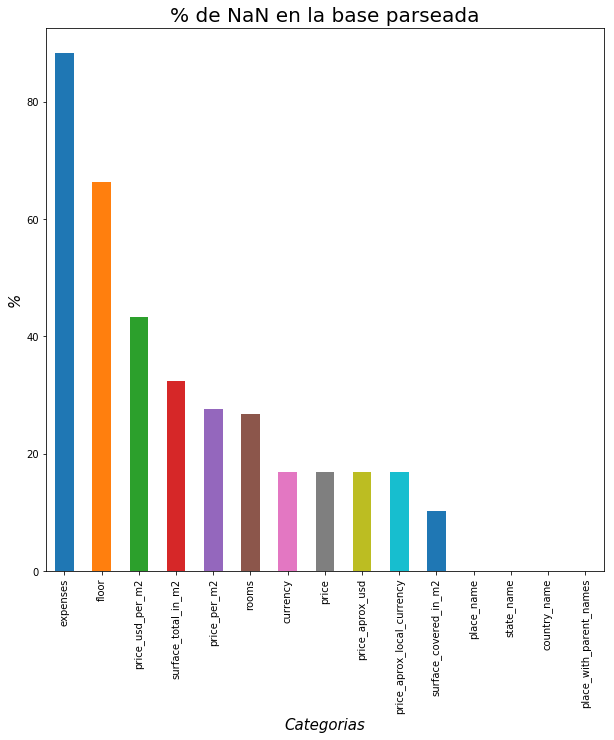

In [9]:
total = 121220
null_02 = np.round((df[["place_name","place_with_parent_names","country_name","state_name","price","currency","price_aprox_local_currency","price_aprox_usd","surface_total_in_m2","surface_covered_in_m2","price_usd_per_m2","price_per_m2","floor","rooms","expenses"]].isnull().sum() / total * 100).sort_values(ascending = False),2)
null_02.plot(kind = "bar", figsize = (10,10))
plt.title("% de NaN en la base parseada", size = 20)
plt.xlabel("Categorias",size = 15, style = "italic")
plt.ylabel("%", size = 15, style = "italic")
plt.show()

In [10]:
null_02

expenses                      88.23
floor                         66.26
price_usd_per_m2              43.39
surface_total_in_m2           32.44
price_per_m2                  27.69
rooms                         26.84
currency                      16.84
price                         16.84
price_aprox_usd               16.83
price_aprox_local_currency    16.82
surface_covered_in_m2         10.34
place_name                     0.02
state_name                     0.00
country_name                   0.00
place_with_parent_names        0.00
dtype: float64

Enumeramos valores unicos dentro de a columna 'state_name' para corroborar cuales son las zonas entre las que se encuentran distribuidas las propiedades.

### Finalmente, vamos a analizar como quedó el dataframe

In [14]:
df.describe()

,Unnamed: 0,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008360e+05,1.008240e+05,81892.000000,108686.000000,68617.000000,8.765800e+04,40905.000000,88690.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.228307e+06,2.396674e+05,233.795328,146.194781,2160.086916,6.912216e+03,6.626256,2.894205,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904158e+06,3.913068e+05,1782.222147,748.360415,2759.288621,2.837864e+04,53.366890,2.144464,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,0.000000,0.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,2.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,151.000000,2486.411765,3.355549e+03,4.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,97.000000,1.000150e+07


In [12]:
df['price_aprox_usd'].describe()

count    1.008240e+05
mean     2.396674e+05
std      3.913068e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [13]:
df['price_aprox_local_currency'].describe()

count    1.008360e+05
mean     4.228307e+06
std      6.904158e+06
min      0.000000e+00
25%      1.583309e+06
50%      2.558452e+06
75%      4.675792e+06
max      8.212711e+08
Name: price_aprox_local_currency, dtype: float64

In [15]:
df['state_name'].describe()

count              121220
unique                 28
top       Capital Federal
freq                32316
Name: state_name, dtype: object